In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [76]:
yolo = cv2.dnn.readNet('yolov3-tiny.weights','yolov3-tiny.cfg.txt')

In [77]:
classes =[]

with open ('coco.names.txt', 'r') as T:
    classes = T.read().splitlines()

In [78]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [79]:
image= cv2.imread('pedestrians.jpg')

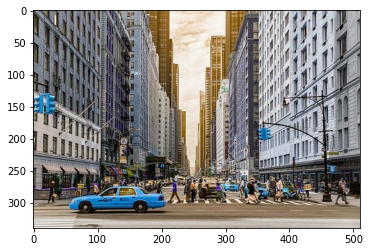

In [80]:
plt.imshow(image)

In [81]:
new_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

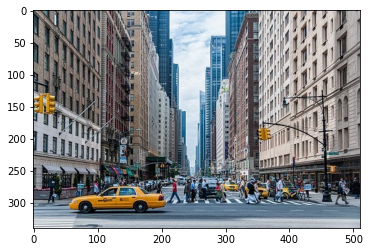

In [82]:
plt.imshow(new_image)

In [83]:
blob = cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [84]:
blob.shape

(1, 3, 320, 320)

In [85]:
width = 320
height =320

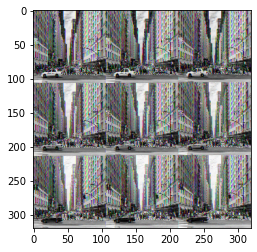

In [86]:
img = blob[0].reshape(320,320,3)

plt.imshow(img)

In [87]:
yolo.setInput(blob)

In [88]:
output_layer_name = yolo.getUnconnectedOutLayersNames()

In [89]:
layer_output = yolo.forward(output_layer_name)

In [90]:
boxes =[]
confidences=[]
class_ids =[]

for output in layer_output:
    for detection in output:
        score=detection[5:]
        class_id = np.argmax(score)
        confidence =score[class_id]
        if confidence > 0.7:
            center_x =int(detection[0]*width)
            center_y =int(detection[0]*height)
            w =int(detection[0]*width)
            h =int(detection[0]*height)
            
            x= int(center_x-w/2)
            y= int(center_y -h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
        

In [91]:
len(boxes)

4

In [92]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences, 0.5,0.4)

In [93]:
font = cv2.FONT_HERSHEY_PLAIN
colour = np.random.uniform(0,255,size=(len(boxes),3))

In [94]:
for i in indexes.flatten():
    x,y,w,h =boxes[i]
    
    label = str(classes[class_ids[i]])
    con = str(round(confidences[i],2))
    col = colour[i]
    
    cv2.rectangle(image,(x,y),(x+w,y+h),col,2)
    cv2.putText(image, label +' '+ con ,(x,y+20),font,2,(255,255,255),1)
    

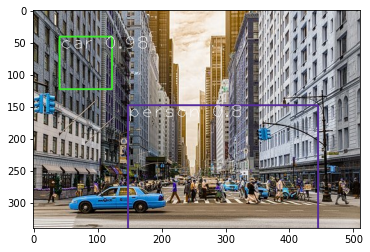

In [95]:
plt.imshow(image)